In [35]:


import pandas as pd
import  numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report as cr
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')   
from sklearn.svm import SVC


# Load dataset
data = pd.read_csv('Advertisement.csv')
# Display first few rows of the dataset
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [17]:
print(data.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [18]:
print(data.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [19]:
print(data.duplicated().sum())

0


In [20]:
print(data.nunique())

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64


In [19]:
# data.drop(columns=['Unnamed: 0'], inplace=True)
#data.drop_duplicates()
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
print(data.corr())

            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


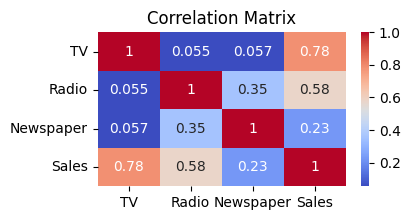

In [20]:
# Visualize the correlation matrix
plt.figure(figsize=(4, 2))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

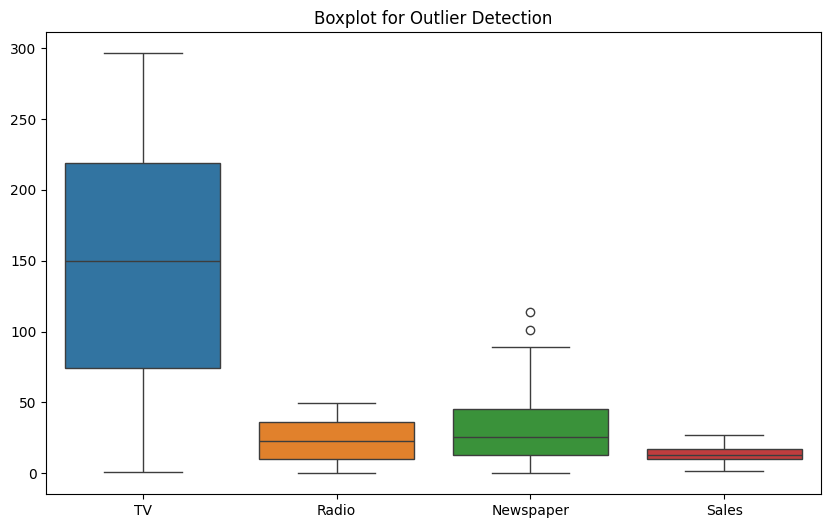

In [21]:
#outlier detection
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=data)
plt.title('Boxplot for Outlier Detection')
plt.show()

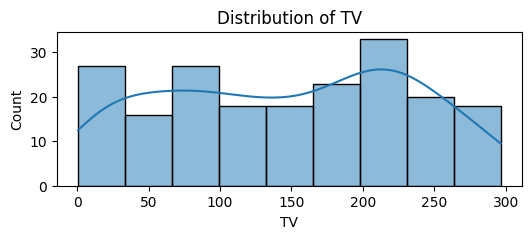

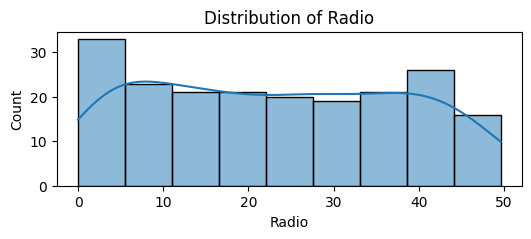

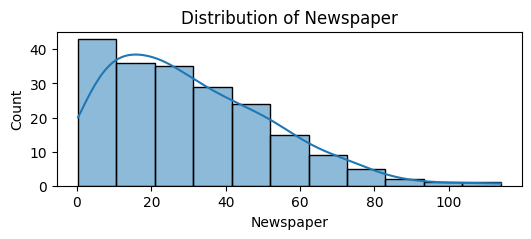

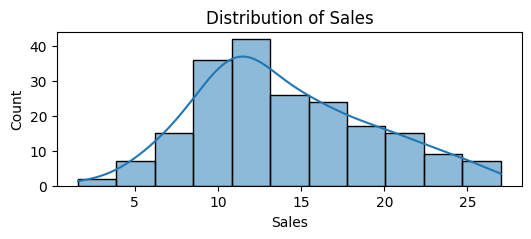

In [22]:
#distribution of variables 
for column in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6,2))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show() 
# plt.figure(figsize=(10,6))
# sns.histplot(data, kde=True)
# plt.title('Distribution of Age')
# plt.show()



In [24]:
for column in data.select_dtypes(include=np.number).columns:
    print(f'{column} - Skewness: {data[column].skew()}, Kurtosis: {data[column].kurt()}')

TV - Skewness: -0.06985336213274573, Kurtosis: -1.2264948242299691
Radio - Skewness: 0.09417463149664404, Kurtosis: -1.2604014033120108
Newspaper - Skewness: 0.8947204074986175, Kurtosis: 0.6495019091381007
Sales - Skewness: 0.4075714250767127, Kurtosis: -0.40886922014994376


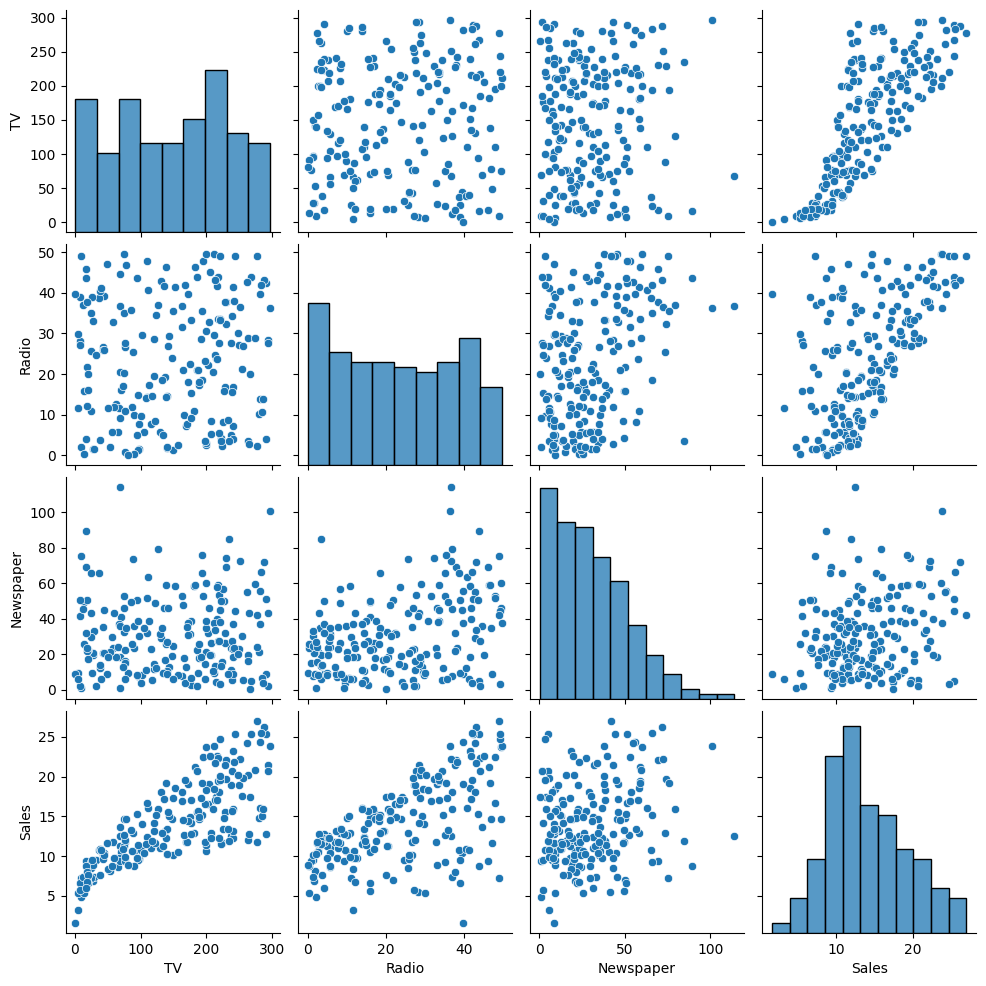

In [25]:
sns.pairplot(data)
plt.show()  


In [27]:
# convert sales to binary classification
median_sales = data["Sales"].median()
print("Median Sales =", median_sales)

data["Sales_Label"] = data["Sales"].apply(
    lambda x: 1 if x >= median_sales else 0
)
data.head()


Median Sales = 12.9


,TV,Radio,Newspaper,Sales,Sales_Label
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,0
2,17.2,45.9,69.3,9.3,0
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,1


Sales_Label
1    102
0     98
Name: count, dtype: int64


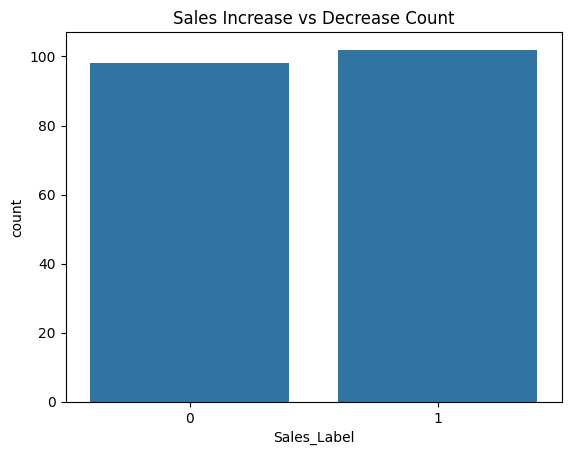

In [28]:
print(data["Sales_Label"].value_counts())

sns.countplot(x="Sales_Label", data=data)
plt.title("Sales Increase vs Decrease Count")
plt.show()

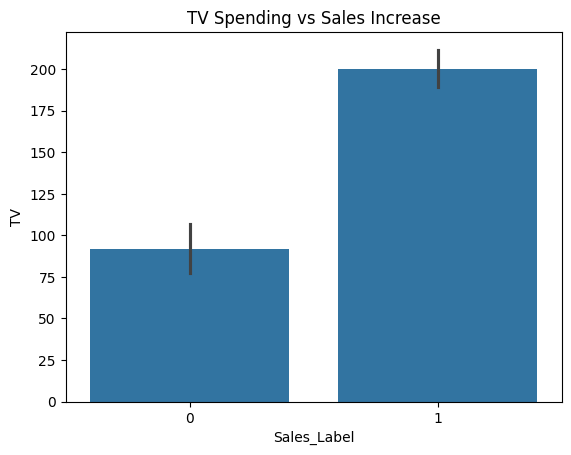

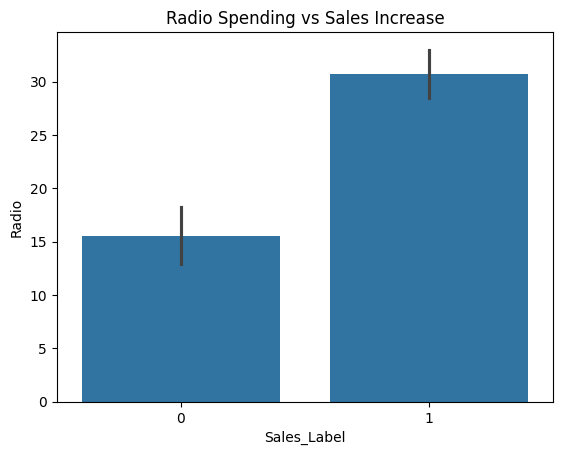

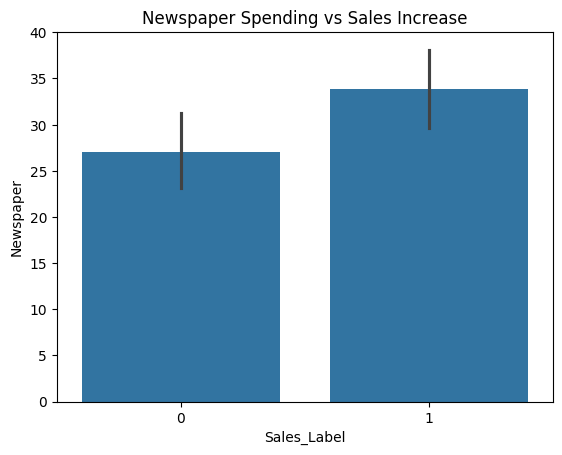

In [29]:
# Feature vs Target Analysis
sns.barplot(x="Sales_Label", y="TV", data=data)
plt.title("TV Spending vs Sales Increase")
plt.show()

sns.barplot(x="Sales_Label", y="Radio", data=data)
plt.title("Radio Spending vs Sales Increase")
plt.show()

sns.barplot(x="Sales_Label", y="Newspaper", data=data)
plt.title("Newspaper Spending vs Sales Increase")
plt.show()

In [32]:
# prepare features and targets

X = data[["TV", "Radio", "Newspaper"]]
y = data["Sales_Label"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# quick shapes check
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (140, 3), y_train shape: (140,)
X_test shape: (60, 3), y_test shape: (60,)


In [37]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC()
}
best_model = None
best_f1 = 0


print("\nMODEL COMPARISON RESULTS\n")

# Train and Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("="*50)
    print("Model:", name)

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    report = cr(y_test, y_pred, output_dict=True)
    print(cr(y_test, y_pred))

    f1 = report["weighted avg"]["f1-score"]

    # Save best model
    if f1 > best_f1:
        best_f1 = f1
        best_model = model

print("\nBest Model Selected:", best_model)

# Save best model into Pickle
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("\nModel saved successfully as best_model.pkl")


MODEL COMPARISON RESULTS

Model: Logistic Regression

Confusion Matrix:
[[35  6]
 [ 1 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        41
           1       0.75      0.95      0.84        19

    accuracy                           0.88        60
   macro avg       0.86      0.90      0.87        60
weighted avg       0.90      0.88      0.89        60

Model: Random Forest

Confusion Matrix:
[[37  4]
 [ 1 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.82      0.95      0.88        19

    accuracy                           0.92        60
   macro avg       0.90      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60

Model: Support Vector Machine

Confusion Matrix:
[[32  9]
 [ 1 18]]

Classification Report:
              precision    recall  f1-score   support

